In [2]:
import pandas as pd
import numpy as np

from pandas import Series, DataFrame

### Series 
A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) of the same type and an associated array of data labels, called its index. The simplest Series is formed from only an array of data:

Another way to think about a Series is as a fixed-length, ordered dictionary, as it is a mapping of index values to data values. It can be used in many contexts where you might use a dictionary:

In [3]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [6]:
print(f'{obj.array} prints the array details \n \n{obj.index} returns the index details')

<NumpyExtensionArray>
[np.int64(4), np.int64(7), np.int64(-5), np.int64(3)]
Length: 4, dtype: int64 prints the array details 
 
RangeIndex(start=0, stop=4, step=1) returns the index details


In [9]:
obj2 = pd.Series([4, 7, -5, 3], index=["d", "b", "a", "c"])

In [12]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

In [13]:
# Use the index labels to select values
obj2["d"]

np.int64(4)

In [20]:
data = {"state": ["Ohio", "Ohio", "Ohio", "Nevada", "Nevada", "Nevada"],
        "year": [2000, 2001, 2002, 2001, 2002, 2003],
        "pop": [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)

In [15]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [28]:
new_df = frame.drop(columns = ["state", "year"])
new_df

,pop
0,1.5
1,1.7
2,3.6
3,2.4
4,2.9
5,3.2


In [21]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [25]:
"state" in frame.columns

True

| Type                | Notes                                                                                                                                           |
|---------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| `df[column]`        | Select single column or sequence of columns from the DataFrame; special case conveniences: Boolean array (filter rows), slice (slice rows), or Boolean DataFrame (set values based on some criterion) |
| `df.loc[rows]`      | Select single row or subset of rows from the DataFrame by label                                                                                 |
| `df.loc[:, cols]`   | Select single column or subset of columns by label                                                                                              |
| `df.loc[rows, cols]`| Select both row(s) and column(s) by label                                                                                                        |
| `df.iloc[rows]`     | Select single row or subset of rows from the DataFrame by integer position                                                                      |
| `df.iloc[:, cols]`  | Select single column or subset of columns by integer position                                                                                   |
| `df.iloc[rows, cols]`| Select both row(s) and column(s) by integer position                                                                                           |
| `df.at[row, col]`   | Select a single scalar value by row and column label                                                                                            |
| `df.iat[row, col]`  | Select a single scalar value by row and column position (integers)                                                                              |
| `reindex` method    | Select either rows or columns by labels                                                                                                         |


NameError: name 'letters' is not defined

In [29]:
list("dde")



['d', 'd', 'e']

In [ ]:
# Read pickle file from github
yahoo_price = "../Data/Yahoo Price.pkl"
yahoo_volume = "../Data/Yahoo Volume.pkl"

# Read in the data sets, store in price and volume objects
price, volume = map(pd.read_pickle, [yahoo_price, yahoo_volume])

In [36]:
price.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2010-01-04,27.990226,313.062468,113.304536,25.884104
2010-01-05,28.038618,311.683844,111.935822,25.892466
2010-01-06,27.592626,303.826685,111.208683,25.733566
2010-01-07,27.541619,296.753749,110.823732,25.465944
2010-01-08,27.724725,300.709808,111.935822,25.641571


In [37]:
# Calculate the returns of each stock
returns = price.pct_change()

In [44]:
returns.info

<bound method DataFrame.info of                 AAPL      GOOG       IBM      MSFT
Date                                              
2010-01-04       NaN       NaN       NaN       NaN
2010-01-05  0.001729 -0.004404 -0.012080  0.000323
2010-01-06 -0.015906 -0.025209 -0.006496 -0.006137
2010-01-07 -0.001849 -0.023280 -0.003462 -0.010400
2010-01-08  0.006648  0.013331  0.010035  0.006897
...              ...       ...       ...       ...
2016-10-17 -0.000680  0.001837  0.002072 -0.003483
2016-10-18 -0.000681  0.019616 -0.026168  0.007690
2016-10-19 -0.002979  0.007846  0.003583 -0.002255
2016-10-20 -0.000512 -0.005652  0.001719 -0.004867
2016-10-21 -0.003930  0.003011 -0.012474  0.042096

[1714 rows x 4 columns]>

<Axes: xlabel='Date', ylabel='AAPL'>

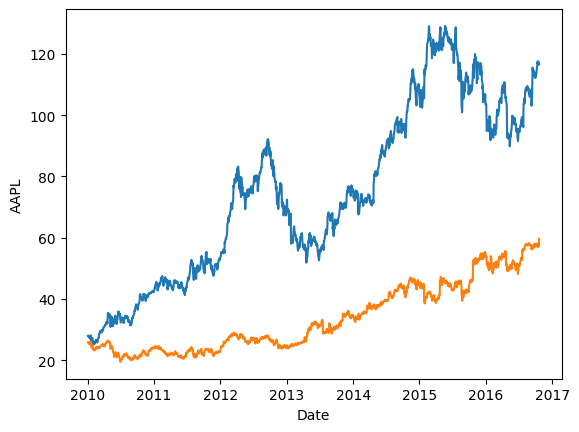

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.lineplot(data = price, y = "AAPL", x = returns.index)
sns.lineplot(data = price, y = "MSFT", x = returns.index)

In [51]:
# Check the correlation between MSFT and IBM
returns["MSFT"].corr(returns["IBM"])

np.float64(0.49976361144151166)

In [ ]:
print(f'{returns["MSFT"].cov(returns["IBM"]):,.6f}')

0.000089


np.float64(8.870655479703549e-05)

In [67]:
# Calculate pairwise corrations
returns.corrwith(returns["IBM"])

AAPL    0.386817
GOOG    0.405099
IBM     1.000000
MSFT    0.499764
dtype: float64

1st entry: {'tim essam': 'tim.essam@gmail.com', 'joe smith': 'jsmith@gmail.com'}
second entry dict_values(['tim.essam@gmail.com', 'jsmith@gmail.com']) 
third entry:dict_items([('tim essam', 'tim.essam@gmail.com'), ('joe smith', 'jsmith@gmail.com')])
tim essam
joe smith


In [ ]:
for email in x.values():
    print(email)
    

tim.essam@gmail.com
jsmith@gmail.com


In [84]:
for name, email in x.items():
    print(name, email)

tim essam tim.essam@gmail.com
joe smith jsmith@gmail.com


Chris bought 4 item(s) at a price of 3.24 for a total of 12.96
